<a href="https://colab.research.google.com/github/alimevren/anlp-fakenewsdetection/blob/main/ANLP_FakeNews_Notebook_(Code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.0MB 6.0MB/s 
     |████████████████████████████████| 3.2MB 40.3MB/s 
     |████████████████████████████████| 890kB 54.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=a3ae11291294623141971a9fdb256251e8b0ee3ea3144f3290f64b7cc1500a6b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import torch
import pandas as pd

if torch.cuda.is_available():
    device = torch.cuda.current_device()
    print('Current device:', torch.cuda.get_device_name(device))
else:
    print('Failed to find GPU. Will use CPU.')
    device = 'cpu'



Current device: Tesla K80


In [ ]:
from google.colab import drive 

drive.mount('/content/drive')
# Go to path
%cd /content/drive/MyDrive
# Make directory named FakeNewsNet
#!mkdir -p FakeNewsNet
# Go to the newly created directory (you possibly have to copypaste the dataset)
%cd FakeNewsDataset/

Mounted at /content/drive
/content/drive/MyDrive
/content/drive/MyDrive/FakeNewsDataset


In [ ]:
def clean_title(title):
  title = title.replace('(VIDEO)', '')
  title = title.replace('(TWEET)', '')
  title = title.replace('(TWEETS)', '')
  title = title.replace('(AUDIO)', '')
  title = title.replace('(VIDEOS)', '')
  title = title.replace('(IMAGE)', '')
  title = title.replace('(IMAGES)', '')
  title = title.replace('(GRAPHIC IMAGES)', '')
  title = title.replace('(DETAILS)', '')
  title = title.replace('(VIDEOS)', '')
  title = title.replace('(IMAGE)', '')
  title = title.replace('[VIDEO]', '')
  title = title.replace('(TWEET/VIDEO)', '')
  title = title.replace('(IMAGE)', '')
  title = title.replace('(SCREENSHOTS)', '')

  return title


In [ ]:
def loadFNN(file: str, category: str, label: int) -> pd.DataFrame:
  """
  Function that loads data from a csv file (specifically for FakeNewsNet dataset)
  and formats it for best model use.

  Parameters
  ----------
  file: str
      The file that contains the data
  category: str
      The category of the news articles which will be added to the dataframe object
  label: str
      Label of the specific news article [0 = real news, 1 = fake news]

  Returns
  -------
  pd.DataFrame
    Data converted into a DataFrame object
  """

  # Create initial dict
  d = {'Title': [], 'Content': [], 'Category': [], 'Label': []}

  titles = pd.read_csv( file, usecols = ['title'], encoding='UTF-8')['title'].tolist()
  for title in titles:
    title = clean_title(title)
    d['Title'].append(title)
    d['Content'].append(None)
    d['Category'].append(category)
    d['Label'].append(label)

  return pd.DataFrame(data=d)

In [ ]:
## Load ISOT Fake News data sets ##

# Dataset full of fake entertainment news
d_gossipcop_fake = loadFNN('gossipcop_fake.csv', 'Entertainment', 1)
# Dataset full of real entertainment news
d_gossipcop_real = loadFNN('gossipcop_real.csv', 'Entertainment', 0)
# Dataset full of fake political news
#d_politifact_fake = loadFNN('politifact_fake.csv', 'Politics', 1)
# Dataset full of real political news
#d_politifact_real = loadFNN('politifact_real.csv', 'Politics', 0)

# Dataset full of fake news (combined fake datasets)
#d_all_fnn_fake = d_gossipcop_fake.append([d_politifact_fake], ignore_index=True)
# Dataset full of real news (combined real datasets)
#d_all_fnn_real = d_gossipcop_real.append([d_politifact_real], ignore_index=True)

d_fakenews = loadFNN('Fake.csv', 'Fake news', 1)
d_realnews = loadFNN('True.csv', 'Real news', 0)

# Dataset including real and fake news
d_allnews = d_fakenews.append([d_realnews], ignore_index=True)
d_allnews[['Title','Label', 'Category']].sample(30)
d_allnews.count()

Title       44898
Content         0
Category    44898
Label       44898
dtype: int64

In [ ]:
print(d_gossipcop_fake['Title'].sample(10))

d_gossipcop_real['Title'].sample(10)
d_gossipcop_fake['Title'].iloc[939]

758              Taylor Swift Suffered Bullying in School
2867    Angelina Jolie & Jared Leto Dating After Brad ...
4185    Kim Kardashian ‘Heartbroken’ Over Ryan Seacres...
3178    Leonardo DiCaprio's Oscar Snubs Compared To Ot...
1312    what the Duchess thinks about love, work and h...
5160    Gwen Stefani & Blake Shelton: Why Friends & Fa...
958     Did Blac Chyna Give Custody Of Daughter Dream ...
2913    Did Rita Ora Diss Prince Harry's Girlfriend Me...
1184    Kim Kardashian Is Reportedly Considering Askin...
2805    Brad Pitt bid $120k to watch 'Game of Thrones'...
Name: Title, dtype: object


"The Truth About Brad Pitt and Angelina Jolie's Divorce"

In [ ]:
## SATIRICAL NEWS + ONION/NOTONION DATASETS ##

%cd /content/drive/MyDrive
# Make directory named Satirical
#!mkdir -p Satiric
# Go to the newly created directory (you have to copypaste the Satirical dataset csv file from the SatiricLR dataset and the OnionNotOnion.csv file into this newly created directory)
%cd Satiric

/content/drive/MyDrive
/content/drive/MyDrive/Satiric


In [ ]:
!ls

all			    d_political_satire.csv   FND1	     Technology
d_all_satire.csv	    d_technology_satire.csv  OnionOrNot.csv
d_entertainment_satire.csv  Entertainment	     Politics


In [ ]:
# Load in Satirical datasets from csv files
d_political_satire = pd.read_csv('d_political_satire.csv', usecols=["Title", "Content", "Category", "Label"])
d_technology_satire = pd.read_csv('d_technology_satire.csv', usecols=["Title", "Content", "Category", "Label"])
d_entertainment_satire = pd.read_csv('d_entertainment_satire.csv', usecols=["Title", "Content", "Category", "Label"])

d_all_satire = pd.read_csv('d_all_satire.csv', usecols=["Title", "Content", "Category", "Label"])

d_all_satire[['Title','Label']].sample(10)

,Title,Label
1117,New Firefox Browser Automatically Blocks ‘Gay ...,1
956,Samsung S5 wants a fight,1
64,Poll: Congress Slightly More Popular Than Ebola,1
97,Kirk Cameron Ready to Start Curing Gays With B...,1
1616,Shocking DNA Results Revealed: Body Of Elderly...,1
477,China Arrests Lovestruck Blogger For Crimes Ag...,1
1542,Nation hoping there are flesh-eating kangaroos...,1
1459,Obama Fines ABC For Broadcasting Charlie Brown...,1
1554,New England Patriots Quarterback Tom Brady To ...,1
506,Hugo Chavez Voted for Capriles In Venezuela El...,1


In [ ]:
d_allnews_with_satirical = d_allnews.append([d_all_satire], ignore_index=True)

In [ ]:
#Load AI generated news
%cd /content/drive/MyDrive/fake_news/
!ls

[Errno 2] No such file or directory: '/content/drive/MyDrive/fake_news/'
/content/drive/MyDrive/FakeNewsDataset
Fake.csv	    gossipcop_real.csv	 politifact_real.csv
gossipcop_fake.csv  politifact_fake.csv  True.csv


In [ ]:
import csv

orig = pd.read_csv('t5_generated_fake_news.csv')

orig.rename( columns={'Unnamed: 0':'Label'}, inplace=True )
orig.rename( columns={'generated':'Title'}, inplace=True )

orig.head()

FileNotFoundError: ignored

In [ ]:
keep_col = ['Label', 'Title']
generated_fake_news = orig[keep_col]

generated_fake_news.to_csv('generated_fake_news.csv', index=False)
generated_fake_news.rename( columns={'generated':'Title'}, inplace=True )


generated_fake_news.sample(10)

NameError: ignored

In [ ]:
# Dataset RealNews original titles vs machine generated titles
%cd /content/drive/MyDrive/FakeNewsDataset/
d_generated_fake = pd.read_csv('generated_titles.csv')
d_generated_real = pd.read_csv('generated_titles_real.csv')

d_generated_fake.rename(columns = {'title':'Title', 'label':'Label'}, inplace = True) 
d_generated_real.rename(columns = {'title':'Title', 'label':'Label'}, inplace = True) 

d_generated_real.sample(10)


d_generated_all = pd.DataFrame(columns=['Title','Label'])
for i, row in d_generated_real.iterrows():
    d_generated_all = d_generated_all.append(row)
    d_generated_all = d_generated_all.append(d_generated_fake.iloc[i])

d_generated_all

/content/drive/MyDrive/FakeNewsDataset


,Title,Label,Unnamed: 0
0,Here's what happened when we blew NYC's mind w...,0,0.0
0,How you get rid of the trash that ripples down...,1,0.0
1,"In Pope Francis era, Catholics still finding t...",0,1.0
1,Ex-waffen SS guard sentenced to 35 years in US...,1,1.0
2,Aussie who killed 2 in crashes wants driver's ...,0,2.0
...,...,...,...
1460,Hong Kong evacuees abandon tour but suffer flo...,1,1460.0
1461,Comcast will pay you $20 if a technician shows...,0,1461.0
1461,Terrifying Images on Snapchat: Are Parents Sen...,1,1461.0
1462,"GeekWork Picks: Avvo continues expansion, plan...",0,1462.0


In [ ]:
def loadOnion(file: str) -> pd.DataFrame:
  """
  Loads in the Onion/Non-Onion dataset and converts it into pandas DataFrame

  Parameters
  ----------
  file: str
    Path of the Onion/Non-Onion csv file (OnionOrNot.csv)

  Returns
  -------
  pd.DataFrame
    Data converted into a DataFrame object
  """
  # Create initial dictionary
  d = {'Title': [], 'Content': [], 'Category': [], 'Label': []}

  pd_articles = pd.read_csv(file, usecols=['text', 'label'])

  list_articles = pd_articles.to_records(index=False)
  for article in list_articles:
    d['Title'].append(article[0])
    d['Content'].append(None)
    d['Category'].append(None)
    d['Label'].append(article[1])

  return pd.DataFrame(data=d)


In [ ]:
# Load Onion/Non-Onion dataset
d_onion_notonion = loadOnion('OnionOrNot.csv')

d_onion_notonion[['Title','Label']].sample(10)


,Title,Label
11238,High School Teacher Fired For Showing Students...,0
23763,Donald Trump refuses to release birth certific...,0
17055,Peaceful Protest Interrupted By Swarm Of Aggre...,1
16822,Michelle Obama To DNC: ‘After This Election Yo...,1
10029,Shed hits 100mph to break speed record at Pend...,0
23148,56-Year-Old Is Slammed For Controversial Form ...,0
18117,Cat-hating man divorces wife when surprised wi...,0
13881,Following His Heart: Nick Jonas Fell In Love W...,1
23553,Man Who Reported Defective Candy 60 Years Ago ...,0
7417,Goldsmiths student diversity officer 'bans' wh...,0


In [ ]:
def removeDuplicate(dataset_1: pd.DataFrame, dataset_2: pd.DataFrame) -> pd.DataFrame:
  """
  Checks if there are any duplicate articles between two data sets and removes these duplicates from the first data set

  Parameters
  -----------
  dataset_1: pd.DataFrame
    First data set that has been formatted for training
  dataset_2: pd.DataFrame
    Second data set that has been formatted for training

  Return
  ------
  dataset_2: pd.DataFrame
    The first inputted data set with the duplicates removed 
  """  

  for idx_1, title_1 in enumerate(dataset_1['Title']):
    for idx_2, title_2 in enumerate(dataset_2['Title']):
      if title_1 == title_2:
        print("Duplicate Title: " + title_1)
        print("idx 1 = " + str(idx_1))
        print("idx 2 = " + str(idx_2))
        dataset_1 = dataset_1.drop(idx_1)
  
  return dataset_1

In [ ]:
# Removes dupplicates in onion/notonion data set and satire data set
d_onion_notonion = removeDuplicate(d_onion_notonion, d_all_satire)

Duplicate Title: Bachmann: ‘Muslims Invented Global Warming’ to Destroy U.S. Economy
idx 1 = 1022
idx 2 = 355


### **Tokenization & Formatting**

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
print('Loading BERT tokenizer...')
#tk = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tk = BertTokenizer.from_pretrained('prajjwal1/bert-medium', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
from typing import List, Tuple

def getMaxLen(titles: List) -> int:
  """
  Determines the maximum length of the inputted list (number of tokens) of titles with special tokens added.
  
  Parameters
  ----------
  titles: List
      List of all title values from dataset

  Return
  ------
  max_len: int
      The maximum sentence length (number of tokens) of the inputted list of titles
  """

  max_len = 0

  for title in titles:
    # Tokenize text and add '[CLS]' and '[SEP]' tokens.
    input_ids = tk.encode(title, add_special_tokens=True)

    # Update maximum sentence length (number of tokens)
    max_len = max(max_len, len(input_ids))

  return max_len

def tokenize(titles: List, labels: List) -> Tuple[torch.cat, torch.cat, torch.tensor]:
  """
  Tokenizes all of the titles put in this function and maps the tokens to their word IDs

  Parameters
  ----------
  titles: List
      List of all title values from dataset
  labels: List
      List of all label values from dataset

  Return
  ------
  tuple
      input_ids: torch.cat - Tensor of encoded sentences
      attention_masks: torch.cat - Tensor of atention masks
      labels: torch.tensor - Tensor of labels
  """
  # Gets maximum length of all sentences
  max_len = getMaxLen(titles)

  input_ids = []
  attention_masks = []

  for title in titles:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tk.encode_plus(
        title,
        add_special_tokens = True,
        max_length = 512,
        padding = 'max_length',
        return_attention_mask = True,
        return_tensors = 'pt'
    )
    # Add the encoded sentence to the list 
    input_ids.append(encoded_dict['input_ids'])
    # And its attention mask (simply differentiates padding from non-padding)
    attention_masks.append(encoded_dict['attention_mask'])

  # Convert lists into tensors
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  labels = torch.tensor(labels)

  return input_ids, attention_masks, labels


In [ ]:
titles = d_all_satire.Title.values
labels = d_all_satire.Label.values

input_ids, attention_masks, labels = tokenize(titles, labels)

print('Original:       ', titles[0])
print('Token IDs:      ', input_ids[0])
print('Attention Mask: ', attention_masks[0])

Original:        Rudd Challenges John Key for Premiership
Token IDs:       tensor([  101, 25298,  7860,  2198,  3145,  2005, 11264,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,    

In [ ]:
titles = d_allnews.Title.values
labels = d_allnews.Label.values

input_ids, attention_masks, labels = tokenize(titles, labels)

print('Original:       ', titles[0])
print('Token IDs:      ', input_ids[0])
print('Attention Mask: ', attention_masks[0])

Original:         Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing
Token IDs:       tensor([  101,  6221,  8398, 10255,  2041, 16436,  2047,  2095,  1521,  1055,
         6574,  4471,  1025,  2023,  2003, 14888,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,

In [ ]:
titles = d_allnews_with_satirical.Title.values
labels = d_allnews_with_satirical.Label.values

input_ids, attention_masks, labels = tokenize(titles, labels)

print('Original:       ', titles[0])
print('Token IDs:      ', input_ids[0])
print('Attention Mask: ', attention_masks[0])

Original:         Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing
Token IDs:       tensor([  101,  6221,  8398, 10255,  2041, 16436,  2047,  2095,  1521,  1055,
         6574,  4471,  1025,  2023,  2003, 14888,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,

In [ ]:
import os
import numpy as np
import random
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import classification_report, precision_recall_curve, PrecisionRecallDisplay, \
    average_precision_score


def save_training_plot(df_stats, output_dir):
    # Use plot styling from seaborn.
    sns.set(style='darkgrid')

    # Increase the plot size and font size.
    sns.set(font_scale=1.5)
    plt.rcParams["figure.figsize"] = (12, 6)

    # Plot the learning curve.
    plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
    plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

    # Label the plot.
    plt.title("Training & Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.xticks([1, 2, 3, 4])

    plt.savefig(os.path.join(output_dir, '{}'.format('task1')))

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

def main():

    args_lang = 'en'
    args_nclasses = 2
    args_epochs = 2
    args_seed = 42
    args_force_cpu = False

    if args_lang == 'en':
        bert_model_name = 'prajjwal1/bert-medium'
    else:
        raise NotImplementedError

    # If there's a GPU available...
    if torch.cuda.is_available() and not args_force_cpu:

        # Tell PyTorch to use the GPU.
        device = torch.device("cuda")

        print('There are %d GPU(s) available.' % torch.cuda.device_count())

        print('We will use the GPU:', torch.cuda.get_device_name(0))

    # If not...
    else:
        print('No GPU available, using the CPU instead.')
        device = torch.device("cpu")

    if args_lang == 'en':
        tokenizer = BertTokenizer.from_pretrained(bert_model_name, do_lower_case=True)

    # Setting input data
    titles = d_allnews.Title.values
    labels = d_allnews.Label.values
    input_ids, attention_masks, labels = tokenize(titles, labels)

    dataset = TensorDataset(input_ids, attention_masks, labels)
    # Create a 80-10-10 train-validation-test split.

    # Calculate the number of samples to include in each set.
    train_size = int(0.8 * len(dataset))
    val_size = int(0.1 * len(dataset))
    test_size= len(dataset) - train_size - val_size

    # Divide the dataset by randomly selecting samples.
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
    print(len(test_dataset))

    print('{:>5,} training samples'.format(train_size))
    print('{:>5,} validation samples'.format(val_size))
    print('{:>5,} test samples'.format(test_size))

    batch_size = 8

    # Create the DataLoaders for our training and validation sets.
    # We'll take training samples in random order.
    train_dataloader = DataLoader(
        train_dataset,  # The training samples.
        sampler=RandomSampler(train_dataset),  # Select batches randomly
        batch_size=batch_size  # Trains with this batch size.
    )

    # For validation the order doesn't matter, so we'll just read them sequentially.
    validation_dataloader = DataLoader(
        val_dataset,  # The validation samples.
        sampler=SequentialSampler(val_dataset),  # Pull out batches sequentially.
        batch_size=batch_size  # Evaluate with this batch size.
    )

    # Load BertForSequenceClassification, the pretrained BERT model with a single
    # linear classification layer on top.
    
    model = BertForSequenceClassification.from_pretrained(
        bert_model_name,  # Use the 12-layer BERT model, with an uncased vocab.
        num_labels=args_nclasses,  # The number of output labels--2 for binary classification.
        # You can increase this for multi-class tasks.
        output_attentions=False,  # Whether the model returns attentions weights.
        output_hidden_states=False,  # Whether the model returns all hidden-states.
    ).to(device)

    # For Quantization
    #quantized_model = torch.quantization.quantize_dynamic(
    #    model, {torch.nn.Linear}, dtype=torch.qint8
    #)

    def print_size_of_model(model):
        torch.save(model.state_dict(), "temp.p")
        print('Size (MB):', os.path.getsize("temp.p")/1e6)
        os.remove('temp.p')

    print_size_of_model(model)
    #print_size_of_model(quantized_model)

    model.train()

    # Tell pytorch to run this model on the GPU.
    if not args_force_cpu:
      model.cuda()

    # Get all of the model's parameters as a list of tuples.
    params = list(model.named_parameters())

    print('The BERT model has {:} different named parameters.\n'.format(len(params)))

    print('==== Embedding Layer ====\n')

    for p in params[0:5]:
        print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

    print('\n==== First Transformer ====\n')

    for p in params[5:21]:
        print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

    print('\n==== Output Layer ====\n')

    for p in params[-4:]:
        print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

    optimizer = AdamW(model.parameters(),
                      lr=2e-5,  # args.learning_rate - default is 5e-5, our notebook had 2e-5
                      eps=1e-8  # args.adam_epsilon  - default is 1e-8.
                      )

    total_steps = len(train_dataloader) * args_epochs

    # Create the learning rate scheduler.
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0,  # Default value in run_glue.py
                                                num_training_steps=total_steps)

    random.seed(args_seed)
    np.random.seed(args_seed)
    torch.manual_seed(args_seed)
    torch.cuda.manual_seed_all(args_seed)

    # We'll store a number of quantities such as training and validation loss,
    # validation accuracy, and timings.
    training_stats = []

    # Measure the total training time for the whole run.
    total_t0 = time.time()

    # For each epoch...
    for epoch_i in range(0, args_epochs):

        # ========================================
        #               Training
        # ========================================

        # Perform one full pass over the training set.

        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, args_epochs))
        print('Training...')

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_train_loss = 0

        # Put the model into training mode. Don't be mislead--the call to
        # `train` just changes the *mode*, it doesn't *perform* the training.
        # `dropout` and `batchnorm` layers behave differently during training
        # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
        model.train()
        model.to(device)

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):

            # Progress update every 40 batches.
            if step % 40 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)

                # Report progress.
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

            # Unpack this training batch from our dataloader.
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using the
            # `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids
            #   [1]: attention masks
            #   [2]: labels
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Always clear any previously calculated gradients before performing a
            # backward pass. PyTorch doesn't do this automatically because
            # accumulating the gradients is "convenient while training RNNs".
            # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
            model.zero_grad()

            # Perform a forward pass (evaluate the model on this training batch).
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # It returns different numbers of parameters depending on what arguments
            # arge given and what flags are set. For our useage here, it returns
            # the loss (because we provided labels) and the "logits"--the model
            # outputs prior to activation.
            result = model(b_input_ids,token_type_ids=None, attention_mask=b_input_mask, labels=b_labels, return_dict=True)

            loss = result.loss
            logits = result.logits

            print(loss)
            # Accumulate the training loss over all of the batches so that we can
            # calculate the average loss at the end. `loss` is a Tensor containing a
            # single value; the `.item()` function just returns the Python value
            # from the tensor.
            total_train_loss += loss.item()

            # Perform a backward pass to calculate the gradients.
            loss.backward()

            # Clip the norm of the gradients to 1.0.
            # This is to help prevent the "exploding gradients" problem.
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and take a step using the computed gradient.
            # The optimizer dictates the "update rule"--how the parameters are
            # modified based on their gradients, the learning rate, etc.
            optimizer.step()

            # Update the learning rate.
            scheduler.step()

        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)

        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epcoh took: {:}".format(training_time))

        # ========================================
        #               Validation
        # ========================================
        # After the completion of each training epoch, measure our performance on
        # our validation set.

        print("")
        print("Running Validation...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        # Tracking variables
        total_eval_accuracy = 0
        total_eval_loss = 0
        nb_eval_steps = 0

        # Evaluate data for one epoch
        for batch in validation_dataloader:
            # Unpack this training batch from our dataloader.
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using
            # the `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids
            #   [1]: attention masks
            #   [2]: labels
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Tell pytorch not to bother with constructing the compute graph during
            # the forward pass, since this is only needed for backprop (training).
            with torch.no_grad():
                # Forward pass, calculate logit predictions.
                # token_type_ids is the same as the "segment ids", which
                # differentiates sentence 1 and 2 in 2-sentence tasks.
                # The documentation for this `model` function is here:
                # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                # Get the "logits" output by the model. The "logits" are the output
                # values prior to applying an activation function like the softmax.

                result = model(b_input_ids,labels=b_labels)
                loss = result.loss
                logits = result.logits

            # Accumulate the validation loss.
            total_eval_loss += loss.item()

            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            total_eval_accuracy += flat_accuracy(logits, label_ids)

        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)

        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur.': avg_val_accuracy,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )

    print("")
    print("Training complete!")

    print("Total training took {:} (h:mm:ss)".format(format_time(time.time() - total_t0)))

    # Display floats with two decimal places.
    pd.set_option('precision', 2)

    # Create a DataFrame from our training statistics.
    df_stats = pd.DataFrame(data=training_stats)

    # Use the 'epoch' as the row index.
    df_stats = df_stats.set_index('epoch')

    # A hack to force the column headers to wrap.
    # df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

    # Display the table.
    print(df_stats)

    output_dir = './' + 'SatiricalModel'
    # Create output directory if needed
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    save_training_plot(df_stats, output_dir)

    print("Saving model to %s" % output_dir)
    model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
    model_to_save.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)

    # TEST SET
    prediction_dataloader = DataLoader(
        test_dataset,  # The test samples.
        sampler=SequentialSampler(test_dataset),  # Pull out batches sequentially.
        batch_size=1  # Evaluate with this batch size.
    )

    # Put model in evaluation mode
    model.eval()

    # Tracking variables
    predictions, true_labels, logits_predictions = [], [], []

    # Predict
    for batch in prediction_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and
        # speeding up prediction
        with torch.no_grad():
            # Forward pass, calculate logit predictions
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask)

        #logits = outputs[0]
        logits = outputs.logits

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Store predictions and true labels
        pred_labels_i = np.argmax(logits, axis=1).flatten()
        predictions.extend(pred_labels_i)

        pred_labels_i = logits.squeeze()[1]
        logits_predictions.append(pred_labels_i)

        true_labels.extend(label_ids)

    print(classification_report(true_labels, predictions))

    print('DONE.')

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB
4491
35,918 training samples
4,489 validation samples
4,491 test samples


Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Streaming output truncated to the last 5000 lines.
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2362, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7334, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward>)
tenso

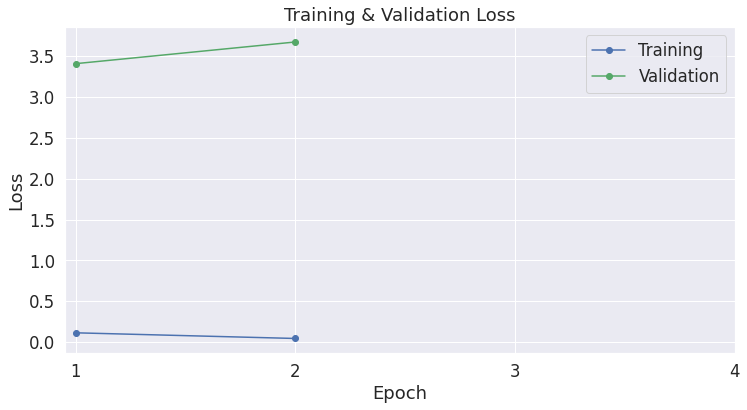

In [ ]:
main()

In [ ]:
from google.colab import drive 

drive.mount('/content/drive')
# Go to path
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
## Load FakeNewsNet datasets ##

# Dataset full of fake entertainment news
d_gossipcop_fake = loadFNN('gossipcop_fake.csv', 'Entertainment', 1)
# Dataset full of real entertainment news
d_gossipcop_real = loadFNN('gossipcop_real.csv', 'Entertainment', 0)
# Dataset full of fake political news
d_politifact_fake = loadFNN('politifact_fake.csv', 'Politics', 1)
# Dataset full of real political news
d_politifact_real = loadFNN('politifact_real.csv', 'Politics', 0)

# Dataset full of fake news (combined fake datasets)
d_all_fnn_fake = d_gossipcop_fake.append([d_politifact_fake], ignore_index=True)
# Dataset full of real news (combined real datasets)
d_all_fnn_real = d_gossipcop_real.append([d_politifact_real], ignore_index=True)

d_all_fnn = d_all_fnn_fake.append([d_all_fnn_real], ignore_index=True)
d_all_fnn.sample(10)

NameError: ignored

In [ ]:
d_generated_fake.head(30)

,Unnamed: 0,Title,Label
0,0,How you get rid of the trash that ripples down...,1
1,1,Ex-waffen SS guard sentenced to 35 years in US...,1
2,2,Former Olympian Debi Thomas breaks down in tea...,1
3,3,Limeade bolsters its corporate wellness roots ...,1
4,4,Iconic Paris master taken to San Marco to care...,1
5,5,Dissension in VA: Why do states considering ma...,1
6,6,Is It Done With Tom Watson? Former Penn State ...,1
7,7,Preserving a law's 'characteristics' is too si...,1
8,8,Arizona woman acquitted in 2007 killing fails ...,1
9,9,Angela Merkel speaks out on Philipp Lahm's ret...,1


In [ ]:
# LOAD EXISTING TRAINED MODEL
#!ls /content/drive/MyDrive/ANLP_FakeNewsDetection/SavedModels/FND1/

# Load the small test dataset into a pandas dataframe.
args_dataset = './'
#dftest = d_allnews
#dftest = generated_fake_news
#dftest = d_onion_notonion
dftest = d_generated_fake
print(dftest)
args_force_cpu = False

# model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/FND1/')
# tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/FND1/')
#model = BertForSequenceClassification.from_pretrained('Models/SatiricalModel/')
#tokenizer = BertTokenizer.from_pretrained('Models/SatiricalModel/')
model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/ANLP_FakeNewsDetection/SavedModels/SatiricalModel/')
tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/ANLP_FakeNewsDetection/SavedModels/SatiricalModel/')

# If there's a GPU available...
if torch.cuda.is_available() and not args_force_cpu:

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

# Copy the model to the GPU.
model.to(device)

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(dftest.shape[0]))

# Measure how long the test classification takes.
t0 = time.time()


titles = dftest.Title.values
labels = dftest.Label.values.astype(np.int)

input_ids, attention_masks, labels = tokenize(titles, labels)

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=1)

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions, true_labels, logits_predictions = [], [], []

# Predict
for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    
    # Telling the model not to compute or store gradients, saving memory and
    # speeding up prediction

    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask)

    #logits = outputs[0]
    logits = outputs.logits

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Store predictions and true labels
    pred_labels_i = np.argmax(logits, axis=1).flatten()
    predictions.extend(pred_labels_i)

    pred_labels_i = logits.squeeze()[1]
    logits_predictions.append(pred_labels_i)

    true_labels.extend(label_ids)

dftest['scores'] = predictions
# dftest.to_csv('/content/drive/MyDrive/FND1/results.csv')
# dftest.to_csv('Results/Exp3Results.csv')
dftest.to_csv('/content/drive/MyDrive/ANLP_FakeNewsDetection/SavedModels/SatiricalModel/Exp4Results2.csv')
print(classification_report(true_labels, predictions))

# Measure how long this test took.
total_time = format_time(time.time() - t0)
print("  Total duration: {:}".format(total_time))
print('DONE.')
#'''

      Unnamed: 0                                              Title  Label
0              0  How you get rid of the trash that ripples down...      1
1              1  Ex-waffen SS guard sentenced to 35 years in US...      1
2              2  Former Olympian Debi Thomas breaks down in tea...      1
3              3  Limeade bolsters its corporate wellness roots ...      1
4              4  Iconic Paris master taken to San Marco to care...      1
...          ...                                                ...    ...
1458        1458  Ballmer sets aside $100, place honorary golf c...      1
1459        1459  Target is facing backlash over non-gender hara...      1
1460        1460  Hong Kong evacuees abandon tour but suffer flo...      1
1461        1461  Terrifying Images on Snapchat: Are Parents Sen...      1
1462        1462  Sunderland draw in League One could provoke sm...      1

[1463 rows x 3 columns]
There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB
Num

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!cp ./FND1/results.csv /content/drive/MyDrive/ANLP_FakeNewsDetection/SavedModels/